In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas
import math
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

numpy.random.seed(7)

# usecols: 사용할 열만 지정  # skipfooter: 마지막 열은 사용하지 않음.
dataframe = pandas.read_csv('/content/drive/MyDrive/미래융합교육원/4월/Passengers.csv', usecols=[1], engine = 'python', skipfooter = 3)

dataset = dataframe.values  # ndarray로 변환
dataset = dataset.astype('float32')
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size  # 33%

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# 시계열 데이터: 자기상관성을 가진 데이터
# window 개수에 따라 데이터 분할 처리

94 47


In [3]:
def create_dataset(dataset, look_back=1):  # 몇 개를 독립 변수로 처리할 것인가.
  dataX, dataY = [], []  # 독립 변수, 종속 변수
  for i in range(len(dataset) - look_back - 1):  # 마지막은 항상 종속 변수가 되어야 하니까..
    a = dataset[i:(i + look_back), 0]  # 0:2 -> 0, 1만 빼서 append 시킴.
    dataX.append(a)  # 모양 유지하며 추가
    dataY.append(dataset[i + look_back, 0])  # 한 개의 데이터만

  return numpy.array(dataX), numpy.array(dataY)

In [4]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)  # 67%
testX, testY = create_dataset(test, look_back)   # 33%

model = Sequential()
model.add(Dense(8, input_dim = look_back, activation = 'relu'))  # 2x8
model.add(Dense(1))  # 8x1 예측
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 200, batch_size = 2, verbose = 2)

testScore = model.evaluate(testX, testY, verbose = 0)

# 데이터의 값에 따라 달라지고, 데이터 특성에 따라 달라짐.
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))  # 상대적으로 봐야 함!

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
46/46 - 2s - 39ms/step - loss: 64013.7656
Epoch 2/200
46/46 - 0s - 10ms/step - loss: 48697.0000
Epoch 3/200
46/46 - 0s - 2ms/step - loss: 35546.7812
Epoch 4/200
46/46 - 0s - 3ms/step - loss: 24323.7793
Epoch 5/200
46/46 - 0s - 3ms/step - loss: 15502.4932
Epoch 6/200
46/46 - 0s - 4ms/step - loss: 8996.6934
Epoch 7/200
46/46 - 0s - 4ms/step - loss: 4780.4419
Epoch 8/200
46/46 - 0s - 4ms/step - loss: 2433.6851
Epoch 9/200
46/46 - 0s - 4ms/step - loss: 1280.1144
Epoch 10/200
46/46 - 0s - 7ms/step - loss: 784.5007
Epoch 11/200
46/46 - 0s - 6ms/step - loss: 606.0085
Epoch 12/200
46/46 - 0s - 3ms/step - loss: 552.6338
Epoch 13/200
46/46 - 0s - 3ms/step - loss: 532.7603
Epoch 14/200
46/46 - 0s - 3ms/step - loss: 529.1305
Epoch 15/200
46/46 - 0s - 2ms/step - loss: 528.7977
Epoch 16/200
46/46 - 0s - 3ms/step - loss: 526.6331
Epoch 17/200
46/46 - 0s - 3ms/step - loss: 527.3090
Epoch 18/200
46/46 - 0s - 3ms/step - loss: 529.6136
Epoch 19/200
46/46 - 0s - 3ms/step - loss: 525.7877
Epoch

# 시각화

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


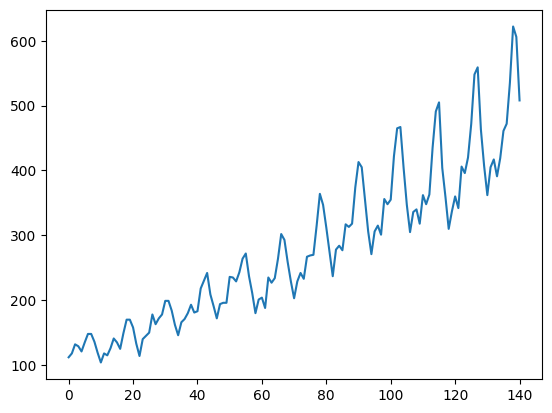

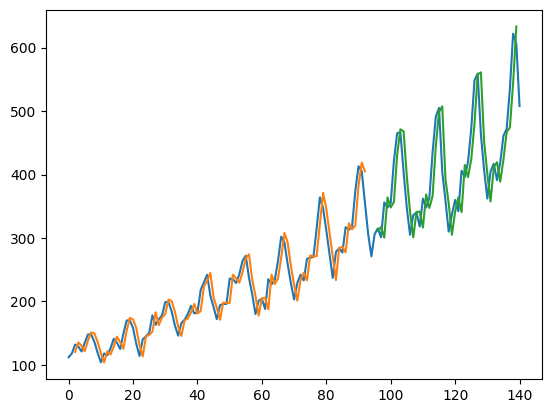

In [5]:
import matplotlib.pyplot as plt

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back: len(trainPredict) + look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(dataset)
plt.show()

plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [6]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

data = np.array([[i] for i in range(50)])
targets = np.array([[i] for i in range(50)])
print(data[:10])

data_gen = TimeseriesGenerator(data, targets,
                               length = 10, sampling_rate = 2, # sampling_rate -> 건너뛰기
                               batch_size = 2)  # 2개의 덩어리로 만들어짐.

assert len(data_gen) == 20
batch_0 = data_gen[0]
print("데이터 구조 ", batch_0)

x, y = batch_0
print("마지막에 생성된 데이터")
data_gen[19]

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
데이터 구조  (array([[[0],
        [2],
        [4],
        [6],
        [8]],

       [[1],
        [3],
        [5],
        [7],
        [9]]]), array([[10],
       [11]]))
마지막에 생성된 데이터


(array([[[38],
         [40],
         [42],
         [44],
         [46]],
 
        [[39],
         [41],
         [43],
         [45],
         [47]]]),
 array([[48],
        [49]]))

# LSTM
  - RNN은 많이 사용하지 않음

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense # Import LSTM here

model = Sequential([
    LSTM(64, activation='relu', input_shape = (30, 1), return_sequences=True),
    Dense(1)
])

import numpy as np
input_data = np.random.rand(32, 30, 1)  # 배치, 셀 수, 입력데이터 특성
output = model.predict(input_data)
print(output.shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
(32, 30, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

import pandas as pd

# 최저기온 저장 데이터 ( 30일 전부터 영향을 받아서 다음 날 하루를 예측 )
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
path = tf.keras.utils.get_file('daily-min-temperatures.csv', url)
df = pd.read_csv(path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Temp']])
sequence_length = 30

generator = TimeseriesGenerator(scaled_data, scaled_data,
                                length = sequence_length, batch_size = 32)

# Long Short Term Memory
# control state(장기 기억을 하기 위한), hidden state(특징을 추출한 결과)
# LSTM의 출력 차수: 64   # Sequence_length 30: 입력 차수
# 3차원으로 데이터 입력
# 배치 사이즈(32), 셀 사이즈(sequence_length), 데이터 사이즈(1) -> 32x30x1
# 셀이 30개 만들어짐.
model = Sequential([
    LSTM(64, activation='relu', input_shape = (sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.fit(generator, epochs = 10, verbose = 1)

67921/67921 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0479
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096
Epoch 9/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091
Epoch 10/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091


In [11]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

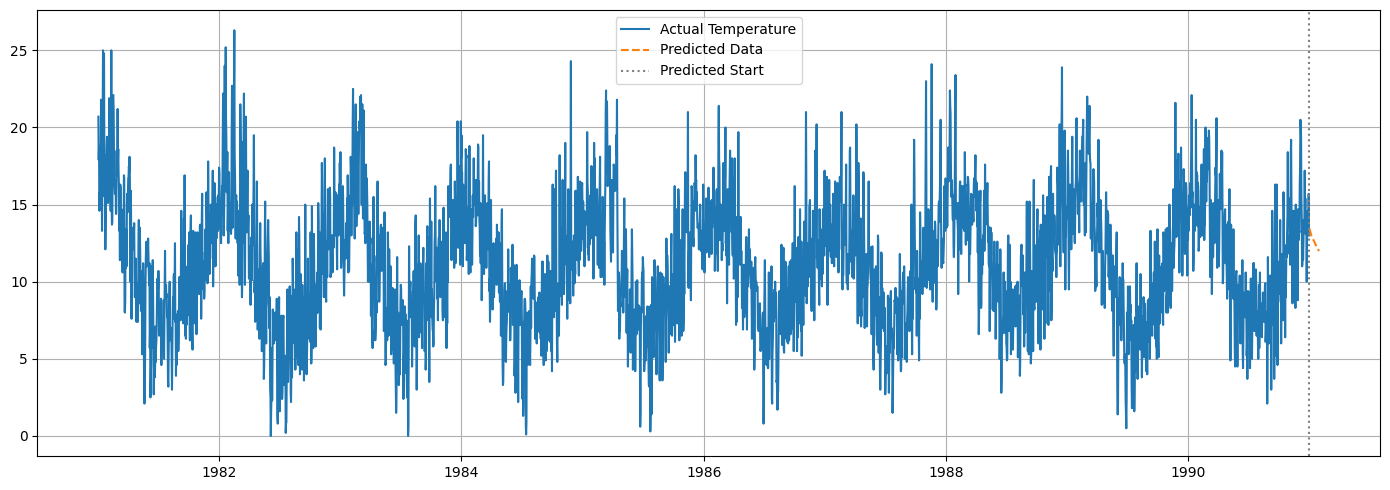

In [12]:
future_steps = 30  # 30일 기간 예측
predictions = []
# 30개의 데이터  # CNN에서 입력 차수는 4차원 (장 수(배치 사이즈), 가로, 세로, 채널)
# LSTM에서는 배치 사이즈, 셀 수, 데이터 특성 수 (임베딩 차수)

# 1, 30, 1  # 셀 수는 계산할 때만 필요하고, 출력 차수엔 영향 X.
input_seq = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)  # 차수를 맞춰서 넣어주기 위해 Reshape 적용

for _ in range(future_steps):
  next_val = model.predict(input_seq, verbose=0)
  predictions.append(next_val[0][0])  # 예측 값
  next_val_reshaped = next_val.reshape(1, 1, 1)
  input_seq = np.append(input_seq[:, 1:, :], next_val_reshaped, axis=1)

predicted_temps = scaler.inverse_transform(  # 원래의 사이즈로 변환
    np.array(predictions).reshape(-1, 1)
)
last_date = df.index[-1]
future_dates = pd.date_range(start = last_date + pd.Timedelta(days = 1),
                             periods = future_steps)
plt.figure(figsize = (14, 5))
plt.plot(df.index, df['Temp'], label = 'Actual Temperature')
plt.plot(future_dates, predicted_temps, label = 'Predicted Data', linestyle = '--')
plt.axvline(x = last_date, color = 'gray', linestyle = ':', label = 'Predicted Start')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 긍부정 분류

In [13]:
import re
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

docs = ['Well done!', 'Good work', 'Great effort', 'nice work', 'Excellent!', 'Weak', 'Poor effort!', 'not good',
        'poor work', 'Could have done better.']

# Well, Done, Good, work, Great, effort, nice, Excellent, Weak, poor, not, Could, have, better
labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]  # 10개의 단어를 이용한 어휘
own_embedding_vocab_size = 10
encoded_docs_oe = [one_hot(d, own_embedding_vocab_size) for d in docs]
print(encoded_docs_oe)

[[4, 7], [8, 9], [7, 9], [6, 9], [8], [3], [9, 9], [5, 8], [9, 9], [7, 1, 7, 1]]


In [14]:
# 사이즈가 불일치
maxlen = 5
padded_docs_oe = pad_sequences(encoded_docs_oe, maxlen = maxlen, padding = 'post')

print(padded_docs_oe)

[[4 7 0 0 0]
 [8 9 0 0 0]
 [7 9 0 0 0]
 [6 9 0 0 0]
 [8 0 0 0 0]
 [3 0 0 0 0]
 [9 9 0 0 0]
 [5 8 0 0 0]
 [9 9 0 0 0]
 [7 1 7 1 0]]


# FFNN 망으로 만듦.

In [15]:
model = Sequential()
model.add(Embedding(input_dim = own_embedding_vocab_size, output_dim=32,  # 32차로 임베딩
                    input_length = maxlen))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # many-to-one network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])
print(model.summary())
model.fit(padded_docs_oe, np.array(labels), epochs = 30, verbose = 0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
def predict_sentiment(sentence):
  encoded = one_hot(sentence, own_embedding_vocab_size)
  padded = pad_sequences([encoded], maxlen=maxlen, padding='post')
  prediction = model.predict(padded, verbose=0)[0][0]
  print(f'\n[입력 문장]  {sentence}')
  print(f'[예측 확률]  {prediction:.4f}')
  print(f'[예측 결과]  {"긍정" if prediction >= 0.5 else "부정"}')

In [29]:
# predict_sentiment('Nice work!')
# predict_sentiment('Excellent effort!')

In [17]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim = own_embedding_vocab_size, output_dim = 64,
                    input_length = maxlen))  # maxlen = 5 / 단어수 -> 셀 사이즈

## 단어 수 만큼, 셀이 필요함.
# LSTM의 차수: (32, 5, 64)
model.add(LSTM(64, return_sequences=False))  # 32 x 64
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))  # 32 x 1
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()
model.fit(padded_docs_oe, np.array(labels), epochs = 30, batch_size = 32, verbose = 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8000 - loss: 0.6847
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6922
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4000 - loss: 0.6910
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4000 - loss: 0.6945
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6000 - loss: 0.6880
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6000 - loss: 0.6878
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 0.6933
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6000 - loss: 0.6871
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6000 - loss: 0.6935
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 0.6952
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6000 - loss: 0.6897
Epoch

# 뉴스 분류

In [22]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 1000  # 셀 수 결정
batch_size = 100
nb_epoch = 200

# reuters: 뉴스 기사
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    num_words = max_words, test_split=0.2
)

nb_classes = np.max(y_train) + 1  # 다중분류의 클래스 수
tokenizer = Tokenizer(nb_words = max_words)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/text.py:98: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


In [23]:
X_train[:5]  # 뉴스 기사 -> embedding

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [24]:
y_train[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [25]:
# 행렬 변환: sequences의 길이를 동일하게 함.
X_train = tokenizer.sequences_to_matrix(X_train, mode = 'binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode = 'binary')

Y_train = to_categorical(y_train, nb_classes)  # 범주형
Y_test = to_categorical(y_test, nb_classes)

model = Sequential()

# 1,000개의 단어 embedding 진행  # FFNN
model.add(Dense(512, input_shape = (max_words,), activation = 'relu'))
model.add(Dropout(0.5))

# 46개 다중 분류
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Validation_split: train 데이터에서 평가용으로 10% 분리
history = model.fit(X_train, Y_train, epochs = nb_epoch, batch_size=batch_size, verbose=0,
                    validation_split = 0.1)

score = model.evaluate(X_test, Y_test, batch_size = batch_size, verbose = 1)

# loss, accuracy
print("\n\nModel accuracy: %.2f%%" % (score[1]*100))
print("Model loss: %.2f%%" % (score[0]*100))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7907 - loss: 1.9346


Model accuracy: 78.41%
Model loss: 195.57%


### 문제1: FFNN을 LSTM으로 수정하시오.
   - 모델을 저장하고, 로딩하시오.
   - Xtest 데이터의 인덱스를 매개변수로 받아서 분류하는 함수를 작성하시오.

In [ ]:
#from .....

In [ ]:
model.save('reuters_lstm_model.keras')

In [ ]:
def test_sample(index):
  print("\n 원문 기사 (시퀀스):", X_test[index])
  input_seq = X_test[index].reshape(1, 100)
  prediction = model.predict(input_seq, verbose = 0)
  predicted_class = numpy.argmax(y_test[index])
  print("예측 카테고리:", predicted_class)
  print("실제 카테고리:", true_class)

In [ ]:
test_sample(5)
for i in range(3):
  print(f"\n 테스트 인덱스 {i}")
  test_sample(i)

# seq2seq

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense

input_texts = ['hello', 'hi', 'how are you', 'good morning']
target_texts = ['안녕', '하이', '좋아', '상쾌']
# seq2seq -> 번역망 (앞에 있는 encoder, 뒤에 있는 decoder)

In [31]:
# 시작문자열과 종료문자열 추가
target_texts = ['\t' + text + '\n' for text in target_texts]

# set: 중복 탐지 (key의 집합)
# 입력 문자의 종류 (heloiwaryugdmn) = [[h], [e], [l], [o]....]
# 단어 자체를 문자 번호로 생성
input_chars = sorted(list(set(''.join(input_texts))))
target_chars = sorted(list(set(''.join(target_texts))))

# 문자 -> 인덱스
input_char2idx  = {char: i for i, char in enumerate(input_chars)}
target_char2idx = {char: i for i, char in enumerate(target_chars)}

# 인덱스 -> 문자
input_idx2char = {i: char for char, i in input_char2idx.items()}
target_idx2char = {i: char for char, i in target_char2idx.items()}

# 사이즈
num_encoder_tokens = len(input_chars)  # 토큰 숫자
num_decoder_tokens = len(target_chars)

# 인코더에 입력된 데이터, 한 단어의 최대 길이
max_encoder_seq_length = max([len(txt) for txt in input_texts])

# 디코더에 입력된 데이터, 한 단어의 최대 길이
max_decoder_seq_length = max([len(txt) for txt in target_texts])

In [34]:
latent_dim = 256  # 입력데이터의 한 단어가 표현되는 차수

## 인코더 (hidden state 1개) -> 디코더
encoder_inputs = Input(shape = (None,))

# num_encoder_tokens: 셀 수를 결정
enc_emb = Embedding(num_encoder_tokens, latent_dim)(encoder_inputs)

# 특성이 256으로 출력됨.  # return_state 전체를 다 사용.
# hidden state, control state를 사용해서 가중치를 나중에 복사하기 위해서.
# encoder_outputs -> 셀마다 출력된 결과
encoder_outputs, state_h, state_c = LSTM(latent_dim, return_state = True)(enc_emb)
encoder_states = [state_h, state_c]

## 디코더
decoder_inputs = Input(shape=(None,))  # 한글이 입력
dec_emb = Embedding(num_decoder_tokens, latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state = True)
# encoder_states가 인코더에서 마지막으로 출력된 결과

decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = encoder_states)

# FFNN 망 ( 분류, 예측 )
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)  # 번역 결과 (단어X, 문자!)

# seq2seq 모델
# Sequential, Functional, Model 상속
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_9             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, None, 256)      │          3,840 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, None, 256)      │          2,560 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ [(None, 256), (None,   │        525,312 │ embedding_4[0][0]      │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ [(None, None, 256),    │        525,312 │ embedding_5[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm_5[0][1],          │
│                           │ 256)]                  │                │ lstm_5[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, None, 10)       │          2,570 │ lstm_6[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,059,594 (4.04 MB)

 Trainable params: 1,059,594 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# 입력 데이터 조작
# 문자 개수 x 단어가 가지는 최대 문자 수 -> 행렬 만들기
# 저절로 padding이 되기 위해서
encoder_input_data = np.zeros((len(input_texts), max_encoder_seq_length), dtype='int32')
decoder_input_data = np.zeros((len(input_texts), max_decoder_seq_length), dtype='int32')
decoder_target_data = np.zeros((len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype = 'float32')

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
  for t, char in enumerate(input_text):
    # 행은 문장 -> 열은 문자
    encoder_input_data[i, t] = input_char2idx[char] # 문자를 숫자로
  for t, char in enumerate(target_text):
    decoder_input_data[i, t] = target_char2idx[char]
    if t > 0:
      decoder_target_data[i, t-1, target_char2idx[char]] = 1.0

In [35]:
model.fit([encoder_input_data, decoder_input_data],
          decoder_target_data,
          batch_size = 2,
          epochs = 100,
          verbose = 1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0833 - loss: 1.7297  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2500 - loss: 1.6722
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2500 - loss: 1.5992
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2500 - loss: 1.5011
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2500 - loss: 1.3861
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2500 - loss: 1.4203
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2500 - loss: 1.3023
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3333 - loss: 1.2311
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4167 - loss: 1.1563
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3333 - loss: 1.1306
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4583 - loss: 0.9650
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4583 - 

In [36]:
## seq2seq 사용할 때 인코더 모델과 디코더 모델을 분리해서 사용함.
## 인코더 모델
# encoder_states: seq2seq 모델의 인코더 출력 hidden state, control state 값
encoder_model = Model(encoder_inputs, encoder_states)  # 학습이 끝난 가중치 공유

# 디코더 입력 정의
decoder_state_input_h = Input(shape = (latent_dim,))  # hidden
decoder_state_input_c = Input(shape = (latent_dim,))  # control
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# num_decoder_tokens 수만큼 cell이 생성
# decoder_states_inputs: 디코더 가중치를 공유
dec_emb2 = Embedding(num_decoder_tokens, latent_dim)(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state = decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # FFNN 망
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs2] + decoder_states2)


# 문자를 단어로 복원

In [37]:
def decode_sequence(input_seq):
  states_value = encoder_model.predict(input_seq)  # 최신 모델의 state
  target_seq = np.zeros((1, 1))
  target_seq[0, 0] = target_char2idx['\t']  # 디코더의 문자열 시작
  stop_condition = False  # 종료 시그널
  decoded_sentence = ''
  while not stop_condition:
    output_tokens, h, c = decoder_model.predict(
        [target_seq] + states_value
    )
    # 아웃풋 토큰에서 가장 확률이 큰 토큰 인덱스를 얻음.
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    # 인덱스를 문자로 변환 (그리고 추가)
    sampled_char = target_idx2char[sampled_token_index]
    decoded_sentence += sampled_char

    # 끝이라면 종료 문자열 추가
    if sampled_char == '\n' or len(decoded_sentence) > max_decoder_seq_length:
      stop_condition = True
    target_seq[0, 0] = sampled_token_index  # 나머지 단어들 가지고 반복
    states_value = [h, c]

  return decoded_sentence

In [38]:
# 단어를 입력해서 번역하는 상황과 많은 데이터로 학습하는 상황은 다름.
def encode_input_text(text):
  input_seq = []
  for char in text:
    if char in input_char2idx:
      input_seq.append(input_char2idx[char])  # 숫자 임베딩
  # 입력 데이터의 사이즈를 규격화
  input_seq = tf.keras.preprocessing.sequence.pad_sequences([input_seq], maxlen = max_encoder_seq_length,
                                                            padding='post')
  return input_seq

test_sentence = "hi"
input_seq = encode_input_text(test_sentence)
output_sentence = decode_sequence(input_seq)  # 문자로 이루어진 결과 -> 단어로 변환
print(f"{test_sentence} -> {output_sentence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
hi -> 하이

